In [150]:
# pip install mlxtend -i https://pypi.douban.com/simple
# pip install ngboost -i https://pypi.tuna.tsinghua.edu.cn/simple

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

from scipy.special import boxcox1p
from scipy.stats import skew,boxcox_normmax


from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,median_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from mlxtend.regressor import StackingCVRegressor # pip install mlxtend -i https://pypi.douban.com/simple
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from ngboost import NGBRegressor
from ngboost.ngboost import NGBoost # pip install ngboost -i https://pypi.tuna.tsinghua.edu.cn/simple

from ngboost.learners import default_tree_learner
from ngboost.distns import Normal

In [3]:
data = pd.read_csv('../data/train.csv')
print('缺省值：',data.isna().sum().sum())
data.head()

缺省值： 0


,Unnamed: 0,market_cap,circulating_market_cap,turnover_ratio,pe_ratio,pe_ratio_lyr,pb_ratio,ps_ratio,pcf_ratio,cash_equivalents,...,roa,net_profit_margin,gross_profit_margin,reverse_240_mean,reverse_240_max,reverse_240_start,reverse_120_mean,reverse_120_max,reverse_120_start,up
0,000002.XSHE,3006.3701,2584.2351,0.7298,7.7085,7.7340,1.5935,0.8185,8.5519,1.732720e+11,...,0.14,5.09,31.28,-0.048486,-0.190111,-0.017877,-0.067591,-0.190111,-0.063898,-0.007584
1,000004.XSHE,47.7827,24.2950,1.5287,3052.5702,1541.6929,3.4228,194.6587,-276.1675,6.683990e+07,...,0.24,15.38,83.07,0.186949,-0.360509,0.247495,0.005048,-0.360509,0.386441,-0.012225
2,000005.XSHE,28.0512,28.0356,0.2799,16.3610,16.0579,1.8284,5.4512,297.9045,9.222150e+07,...,-0.77,-48.92,31.52,-0.115380,-0.313316,-0.060714,-0.081004,-0.180685,-0.117450,-0.003802
3,000006.XSHE,70.1997,70.1120,1.8212,8.5794,8.7622,1.0228,1.7682,-6.7698,2.287954e+09,...,0.90,21.56,47.82,-0.001795,-0.095745,-0.053803,0.033374,-0.077758,-0.022989,0.015686
4,000007.XSHE,27.9930,24.9630,2.1321,-297.6667,125.5995,15.0061,67.3774,768.1830,1.441551e+07,...,-4.42,-260.33,68.37,-0.041280,-0.280859,0.150215,-0.064946,-0.238636,-0.238636,0.001244


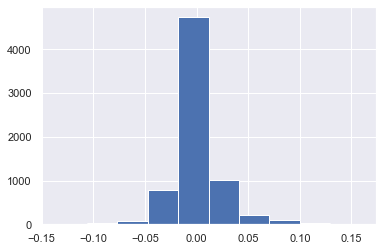

In [4]:
sns.set()
plt.hist(data['up'])
plt.show()

In [6]:
name = data['Unnamed: 0']
Y = data['up']
X = data.drop(['Unnamed: 0','up'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25,random_state=2020)

# 不调参

In [5]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
enet  = ElasticNet()
xgb = XGBRegressor()
lgb = LGBMRegressor()
cat = CatBoostRegressor()
ngb = NGBRegressor()

In [7]:
lr.fit(train_x,train_y)
ridge.fit(train_x,train_y)
lasso.fit(train_x,train_y)
enet.fit(train_x,train_y)
xgb.fit(train_x,train_y,verbose=False)
lgb.fit(train_x,train_y,verbose=False)
cat.fit(train_x,train_y,verbose=False)
ngb.fit(train_x,train_y)

F:\Anaconda\envs\ml\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.6474e-26): result may not be accurate.
  overwrite_a=True).T


[iter 0] loss=-2.3196 val_loss=0.0000 scale=1.0000 norm=0.6535
[iter 100] loss=-2.5340 val_loss=0.0000 scale=2.0000 norm=1.0844
[iter 200] loss=-2.6143 val_loss=0.0000 scale=1.0000 norm=0.5338
[iter 300] loss=-2.6541 val_loss=0.0000 scale=2.0000 norm=1.0583
[iter 400] loss=-2.6806 val_loss=0.0000 scale=1.0000 norm=0.5258


NGBRegressor(random_state=RandomState(MT19937) at 0x235DE1FBCA8)

In [8]:
lr_pre    = lr.predict(test_x)
ridge_pre = ridge.predict(test_x)
lasso_pre = lasso.predict(test_x)
enet_pre  = enet.predict(test_x)
xgb_pre   = xgb.predict(test_x)
lgb_pre   = lgb.predict(test_x)
cat_pre   = cat.predict(test_x)
ngb_pre   = ngb.predict(test_x)

In [23]:
# MAE 平均绝对值误差 
## 用于评估预测结果和真实数据集的接近程度的程度，其其值越小说明拟合效果越好
# MSE 均方差
## 该指标计算的是拟合数据和原始数据对应样本点的误差的平方和的均值，其值越小说明拟合效果越好。
# MedianAE 中值绝对误差
## 此种方法非常适应含有离群点的数据集,越小越好

# EVS 可释方差得分
## 解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。
# R2  决定系数（拟合优度）
## 判定系数，其含义是也是解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。

mae  = []
mse  = []
median_ae = []

evs  = []
r2   = []
all_less = []
all_more = []
for pre,name in zip([lr_pre,ridge_pre,lasso_pre,enet_pre,xgb_pre,lgb_pre,cat_pre,ngb_pre],
                   ['lr','ridge','lasso','enet','xgb','lgb','cat','ngb']):
    print(name,':')
    MAE = mean_absolute_error(test_y,pre)
    MSE = mean_squared_error(test_y,pre)
    EVS = explained_variance_score(test_y,pre)
    Median_AE = median_absolute_error(test_y,pre)
    R2  = r2_score(test_y,pre)
    mae.append(MAE)
    mse.append(MSE)
    evs.append(EVS)
    median_ae.append(Median_AE)
    r2.append(R2)
    print('\t平均绝对值误差\t{}\n\t均方差 \t\t{}\n\t中值绝对误差 \t{}\n\t可释方差得分 \t{}\n\t决定系数 \t{}'.format(
    MAE,MSE,Median_AE,EVS,R2))

lr :
	平均绝对值误差	0.014288303965603513
	均方差 		0.0004677690893305008
	中值绝对误差 	0.00938778290063906
	可释方差得分 	0.016874976132632336
	决定系数 	0.01687328903791485
ridge :
	平均绝对值误差	0.0142876509355531
	均方差 		0.00046771222505339634
	中值绝对误差 	0.009372943215069226
	可释方差得分 	0.016994385159446068
	决定系数 	0.0169928026847036
lasso :
	平均绝对值误差	0.014427797921520028
	均方差 		0.00047376588788739155
	中值绝对误差 	0.009514813169374461
	可释方差得分 	0.004393514186624925
	决定系数 	0.004269607058893232
enet :
	平均绝对值误差	0.0144235696416334
	均方差 		0.0004728540346299509
	中值绝对误差 	0.00952357057278311
	可释方差得分 	0.006307380459011691
	决定系数 	0.006186081050688519
xgb :
	平均绝对值误差	0.016564375395988443
	均方差 		0.0006082845984198974
	中值绝对误差 	0.010882670099182128
	可释方差得分 	-0.2767898841477714
	决定系数 	-0.27845308767488186
lgb :
	平均绝对值误差	0.015437267376697029
	均方差 		0.0005399624184849764
	中值绝对误差 	0.010168146382099098
	可释方差得分 	-0.13394119024978401
	决定系数 	-0.13485796440302278
cat :
	平均绝对值误差	0.015461562261171275
	均方差 		0.0005486730479931835
	中值绝对误差 	0.0100378038

<BarContainer object of 8 artists>

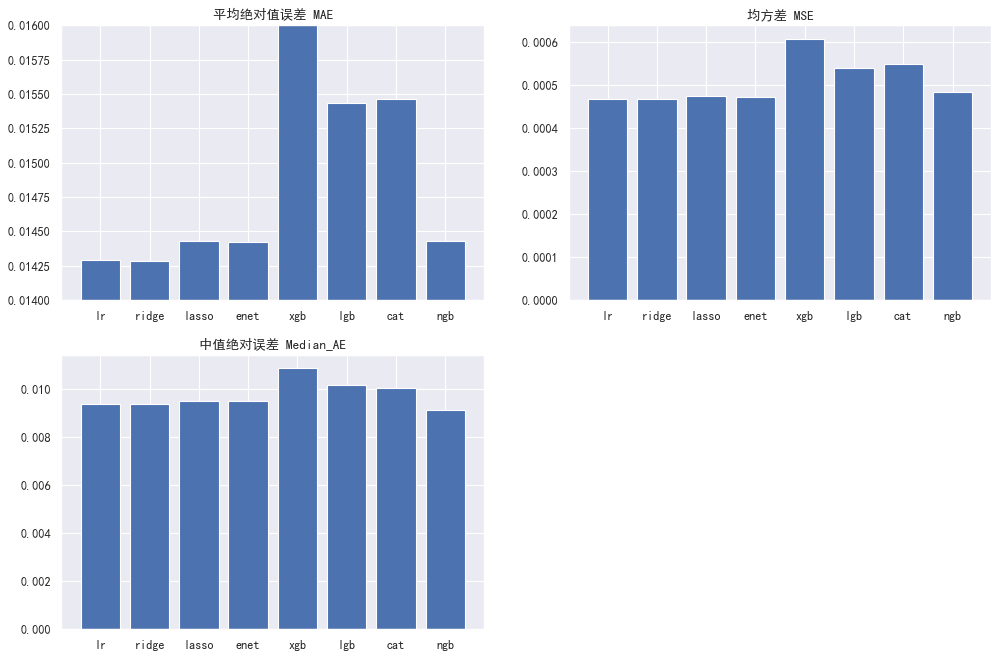

In [91]:
y_plot = mae
x_name = ['lr','ridge','lasso','enet','xgb','lgb','cat','ngb']

plt.figure(figsize=(15,10), dpi=80)

plt.subplot(221)
plt.ylim(0.014,0.016)
plt.title('平均绝对值误差 MAE')
plt.bar(x_name,y_plot)

y_plot = mse
plt.subplot(222)
# plt.ylim(0.014,0.016)
plt.title('均方差 MSE')
plt.bar(x_name,y_plot)

y_plot = median_ae
plt.subplot(223)
# plt.ylim(0.014,0.016)
plt.title('中值绝对误差 Median_AE')
plt.bar(x_name,y_plot)

# 特征工程

In [7]:
X.columns

Index(['market_cap', 'circulating_market_cap', 'turnover_ratio', 'pe_ratio',
       'pe_ratio_lyr', 'pb_ratio', 'ps_ratio', 'pcf_ratio', 'cash_equivalents',
       'total_owner_equities', 'total_sheet_owner_equities', 'roe',
       'inc_return', 'roa', 'net_profit_margin', 'gross_profit_margin',
       'reverse_240_mean', 'reverse_240_max', 'reverse_240_start',
       'reverse_120_mean', 'reverse_120_max', 'reverse_120_start'],
      dtype='object')

## 2.1 规范化

In [113]:
def choose_scaler(model_name,X):
    """
    model_name = ['lr','ridge','xgb','lgb']
    return MAE 和 图
    """
    min_max_scaler  = MinMaxScaler().fit(X)
    standard_scaler = StandardScaler().fit(X)
    
    X_minmax   = min_max_scaler.transform(X) 
    X_standard = standard_scaler.transform(X)
    
    if model_name == 'lr':
        print('（MAE） LR:\t0.014288303965603513')
        
        train_x, test_x, train_y, test_y = train_test_split(X_minmax, Y, test_size=0.25,random_state=2020)
        lr.fit(train_x,train_y)
        minmax = mean_absolute_error(test_y,lr.predict(test_x))
        print('MinMax规范化:  ',minmax)
        train_x, test_x, train_y, test_y = train_test_split(X_standard, Y, test_size=0.25,random_state=2020)
        lr.fit(train_x,train_y)
        standard = mean_absolute_error(test_y,lr.predict(test_x))
        print('Standard规范化:',standard)
        plt.bar(['LR','MinMax规范化','Standard规范化:'],[0.014288303965603513,minmax,standard])
    elif model_name == 'xgb':
        print('（MAE） XGB:\t0.016564375395988443')
        
        train_x, test_x, train_y, test_y = train_test_split(X_minmax, Y, test_size=0.25,random_state=2020)
        xgb.fit(train_x,train_y,verbose=False)
        minmax = mean_absolute_error(test_y,xgb.predict(test_x))
        print('MinMax规范化:  ',minmax)
        train_x, test_x, train_y, test_y = train_test_split(X_standard, Y, test_size=0.25,random_state=2020)
        xgb.fit(train_x,train_y,verbose=False)
        standard = mean_absolute_error(test_y,xgb.predict(test_x))
        print('Standard规范化:',standard)
        plt.bar(['XGB','MinMax规范化','Standard规范化:'],[0.016564375395988443,minmax,standard])
    elif model_name == 'ridge':
        print('（MAE） Ridge:\t0.0142876509355531')
        
        train_x, test_x, train_y, test_y = train_test_split(X_minmax, Y, test_size=0.25,random_state=2020)
        ridge.fit(train_x,train_y)
        minmax = mean_absolute_error(test_y,ridge.predict(test_x))
        print('MinMax规范化:  ',minmax)
        train_x, test_x, train_y, test_y = train_test_split(X_standard, Y, test_size=0.25,random_state=2020)
        ridge.fit(train_x,train_y)
        standard = mean_absolute_error(test_y,ridge.predict(test_x))
        print('Standard规范化:',standard)
        plt.bar(['Ridge','MinMax规范化','Standard规范化:'],[0.0142876509355531,minmax,standard])
    elif model_name == 'lgb':
        print('（MAE） LGB:\t0.015437267376697029')
        
        train_x, test_x, train_y, test_y = train_test_split(X_minmax, Y, test_size=0.25,random_state=2020)
        lgb.fit(train_x,train_y,verbose=False)
        minmax = mean_absolute_error(test_y,lgb.predict(test_x))
        print('MinMax规范化:  ',minmax)
        train_x, test_x, train_y, test_y = train_test_split(X_standard, Y, test_size=0.25,random_state=2020)
        lgb.fit(train_x,train_y,verbose=False)
        standard = mean_absolute_error(test_y,lgb.predict(test_x))
        print('Standard规范化:',standard)
        plt.bar(['LGB','MinMax规范化','Standard规范化:'],[0.015437267376697029,minmax,standard])
    if minmax<standard:print('选择MinMax规范化')
    else:print('选择Standard规范化')

（MAE） LR:	0.014288303965603513
MinMax规范化:   0.014288303906222004
Standard规范化: 0.014288303906222002
选择Standard规范化


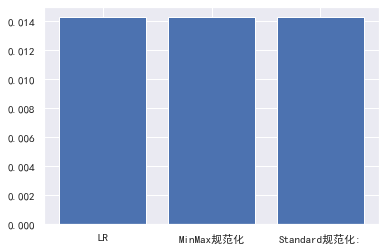

In [114]:
choose_scaler('lr',X)
# Standard规范化

（MAE） Ridge:	0.0142876509355531
MinMax规范化:   0.014276538489326807
Standard规范化: 0.014288305265153891
选择MinMax规范化


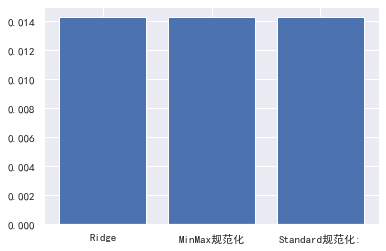

In [120]:
choose_scaler('ridge',X)

（MAE） XGB:	0.016564375395988443
MinMax规范化:   0.016636452918435414
Standard规范化: 0.01656209569765208
选择Standard规范化


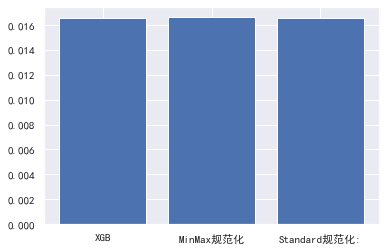

In [116]:
choose_scaler('xgb',X)

（MAE） LGB:	0.015437267376697029
MinMax规范化:   0.0154012110636679
Standard规范化: 0.01539896166397152
选择Standard规范化


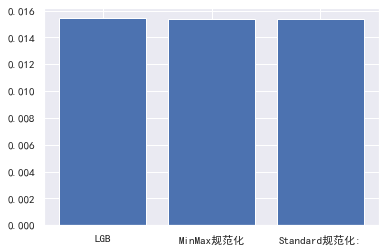

In [117]:
choose_scaler('lgb',X)

选择Standard规范化 （3：1）

In [8]:
X_standard = pd.DataFrame(standard_scaler.transform(X),columns=X.columns)

In [9]:
X.head()

,market_cap,circulating_market_cap,turnover_ratio,pe_ratio,pe_ratio_lyr,pb_ratio,ps_ratio,pcf_ratio,cash_equivalents,total_owner_equities,...,inc_return,roa,net_profit_margin,gross_profit_margin,reverse_240_mean,reverse_240_max,reverse_240_start,reverse_120_mean,reverse_120_max,reverse_120_start
0,3006.3701,2584.2351,0.7298,7.7085,7.7340,1.5935,0.8185,8.5519,1.732720e+11,2.741110e+11,...,0.54,0.14,5.09,31.28,-0.048486,-0.190111,-0.017877,-0.067591,-0.190111,-0.063898
1,47.7827,24.2950,1.5287,3052.5702,1541.6929,3.4228,194.6587,-276.1675,6.683990e+07,1.410845e+09,...,0.25,0.24,15.38,83.07,0.186949,-0.360509,0.247495,0.005048,-0.360509,0.386441
2,28.0512,28.0356,0.2799,16.3610,16.0579,1.8284,5.4512,297.9045,9.222150e+07,1.630011e+09,...,-1.39,-0.77,-48.92,31.52,-0.115380,-0.313316,-0.060714,-0.081004,-0.180685,-0.117450
3,70.1997,70.1120,1.8212,8.5794,8.7622,1.0228,1.7682,-6.7698,2.287954e+09,7.310838e+09,...,1.99,0.90,21.56,47.82,-0.001795,-0.095745,-0.053803,0.033374,-0.077758,-0.022989
4,27.9930,24.9630,2.1321,-297.6667,125.5995,15.0061,67.3774,768.1830,1.441551e+07,1.899865e+08,...,-2.54,-4.42,-260.33,68.37,-0.041280,-0.280859,0.150215,-0.064946,-0.238636,-0.238636


In [10]:
X_standard.head()

,market_cap,circulating_market_cap,turnover_ratio,pe_ratio,pe_ratio_lyr,pb_ratio,ps_ratio,pcf_ratio,cash_equivalents,total_owner_equities,...,inc_return,roa,net_profit_margin,gross_profit_margin,reverse_240_mean,reverse_240_max,reverse_240_start,reverse_120_mean,reverse_120_max,reverse_120_start
0,6.283253,5.865380,-0.514579,0.009112,-0.355857,-0.207767,-0.415505,-0.020787,17.306120,7.519061,...,-0.003616,-0.145411,0.064249,0.127585,-0.395530,0.287772,-0.280458,-0.553713,-0.010594,-0.497072
1,-0.198813,-0.208846,-0.267088,0.637021,9.252308,-0.034175,18.308219,-0.125042,-0.242894,-0.176296,...,-0.009469,-0.092919,0.085998,1.386018,0.599008,-0.975934,0.219028,-0.099194,-1.450539,0.859635
2,-0.242044,-0.199970,-0.653954,0.010896,-0.303719,-0.185476,0.031985,0.085165,-0.240322,-0.170111,...,-0.042571,-0.623088,-0.049908,0.133416,-0.678108,-0.625940,-0.361087,-0.637642,0.069053,-0.658405
3,-0.149699,-0.100131,-0.176474,0.009292,-0.349417,-0.261924,-0.323770,-0.026397,-0.017853,-0.009803,...,0.025651,0.253528,0.099061,0.529486,-0.198294,0.987606,-0.348079,0.078048,0.938837,-0.373827
4,-0.242171,-0.207260,-0.080160,-0.053862,0.382410,1.065028,6.013659,0.257365,-0.248206,-0.210748,...,-0.065782,-2.539044,-0.496750,1.028826,-0.365090,-0.385232,0.035926,-0.537161,-0.420659,-1.023497


# 3 模型

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X_standard, Y, test_size=0.25,random_state=2020)

In [34]:
#定义LR回归模型
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
# fit_intercept:是否有截据，如果没有则直线过原点;
# normalize:是否将数据归一化;
# copy_X:默认为True，当为True时，X会被copied,否则X将会被覆写;
# n_jobs:默认值为1。计算时使用的核数
# 无调参
lr = LinearRegression()

#定义ridge岭回归模型（使用二范数作为正则化项。不论是使用一范数还是二范数，正则化项的引入均是为了降低过拟合风险。）
#注：正则化项如果使用二范数，那么对于任何需要寻优的参数值，在寻优终止时，它都无法将某些参数值变为严格的0，尽管某些参数估计值变得非常小以至于可以忽略。即使用二范数会保留变量的所有信息，不会进行类似PCA的变量凸显。
#注：正则化项如果使用一范数，它比L2范数更易于获得“稀疏(sparse)”解，即它的求解结果会有更多的零分量。
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt))

#定义LASSO收缩模型（使用L1范数作为正则化项）（由于对目标函数的求解结果中将得到很多的零分量，它也被称为收缩模型。）
#注：正则化项如果使用二范数，那么对于任何需要寻优的参数值，在寻优终止时，它都无法将某些参数值变为严格的0，尽管某些参数估计值变得非常小以至于可以忽略。即使用二范数会保留变量的所有信息，不会进行类似PCA的变量凸显。
#注：正则化项如果使用一范数，它比L2范数更易于获得“稀疏(sparse)”解，即它的求解结果会有更多的零分量。
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42))

#定义elastic net弹性网络模型（弹性网络实际上是结合了岭回归和lasso的特点，同时使用了L1和L2作为正则化项。）
enet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, l1_ratio=e_l1ratio))

#定义SVM支持向量机模型                                     
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

#定义GB梯度提升模型（展开到一阶导数）
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)                             

#定义lightgbm模型
lgb= LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       #min_data_in_leaf=2,
                                       #min_sum_hessian_in_leaf=11
                                       )

#定义xgboost模型（展开到二阶导数）                                      
xgb = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     # objective='reg:linear', nthread=-1,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

#定义catboost模型
cat =  CatBoostRegressor(iterations=700,learning_rate=0.02,
                         depth=12,eval_metric='MAE',random_seed = 23,
                         bagging_temperature = 0.2,od_type='Iter',verbose=False)

# 定义ngboost模型
ngb = NGBRegressor(Base=default_tree_learner, Dist=Normal,  natural_gradient=True,verbose=False)

In [38]:
# #集成多个个体学习器
# 这里我仅保留了最好的四大基础模型和一个最好的树模型ngb，下图也证实了模型的效果
stack_gen = StackingCVRegressor(regressors=(lr,ridge,lasso,enet,ngb),
                                meta_regressor=ngb,
                                use_features_in_secondary=True)

In [39]:
mae = []
model_name =    ['lr','ridge','lasso','enet','svr','gbr','lgb','xgb','cat','ngb','stack_gen']
for model,name in zip([lr,ridge,lasso,enet,svr,gbr,lgb,xgb,cat,ngb,stack_gen],model_name):
    model.fit(np.array(train_x),np.array(train_y))
    MAE = mean_absolute_error(model.predict(np.array(test_x)),test_y)
    print('name ',name,':\t')
    print('MAE:',MAE)
    mae.append(MAE)

name  lr :	
MAE: 0.014288303906222002
name  ridge :	
MAE: 0.014287615908247427
name  lasso :	
MAE: 0.014239597897705153
name  enet :	
MAE: 0.01424452891261199
name  svr :	
MAE: 0.015095702050737807
name  gbr :	
MAE: 0.016071717686959825
name  lgb :	
MAE: 0.01476210549949297
name  xgb :	
MAE: 0.014830061730997204
name  cat :	
MAE: 0.015334465343863785
name  ngb :	
MAE: 0.01457002487555275
name  stack_gen :	
MAE: 0.014385880349091471


<BarContainer object of 11 artists>

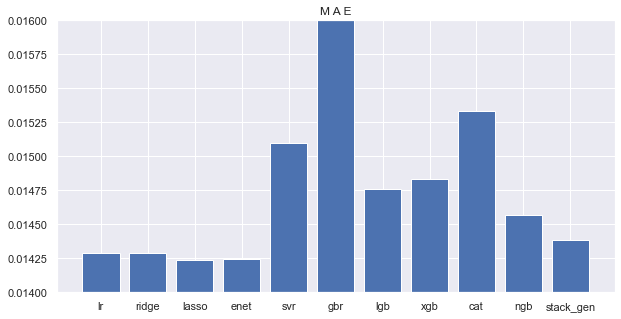

In [44]:
sns.set()
plt.figure(figsize=(10,5))
plt.ylim(0.014,0.016)
plt.title('M A E')
plt.bar(model_name,mae)

In [58]:
mae

[0.014288303906222002,
 0.014287615908247427,
 0.014239597897705153,
 0.01424452891261199,
 0.015095702050737807,
 0.016071717686959825,
 0.01476210549949297,
 0.014830061730997204,
 0.015334465343863785,
 0.01457002487555275,
 0.014385880349091471,
 0.16604886564635143]

In [63]:
w = [1/i for i in mae]
w = [i/sum(w) for i in w]
# 综合多个模型产生的预测值，作为多模型组合学习器的预测值
lr    = lr.fit(train_x,train_y)
ridge = ridge.fit(train_x,train_y)
lasso = lasso.fit(train_x,train_y)
enet  = enet.fit(train_x,train_y)
svr   = svr.fit(train_x,train_y)
gbr   = gbr.fit(train_x,train_y)
lgb   = lgb.fit(train_x,train_y)
xgb   = xgb.fit(train_x,train_y)
cat   = cat.fit(train_x,train_y)
ngb   = ngb.fit(train_x,train_y)
stack_gen = stack_gen.fit(train_x,train_y)

def blend_models_predict(test_x):
    return (
            lr.predict(test_x)      * w[0]+
            ridge.predict(test_x)   * w[1]+
            lasso.predict(test_x)   * w[2]+
            enet.predict(test_x)    * w[3]+
            svr.predict(test_x)     * w[4]+
            gbr.predict(test_x)     * w[5]+
            lgb.predict(test_x)     * w[6]+
            xgb.predict(test_x)     * w[7]+
           cat.predict(test_x)      * w[8]+
           ngb.predict(test_x)      * w[9]+
           stack_gen.predict(np.array(test_x)) * w[10] 
           )
blend_all_pre = blend_models_predict(test_x)


mae.append(mean_absolute_error(blend_all_pre,test_y))
model_name.append('blend')

<BarContainer object of 13 artists>

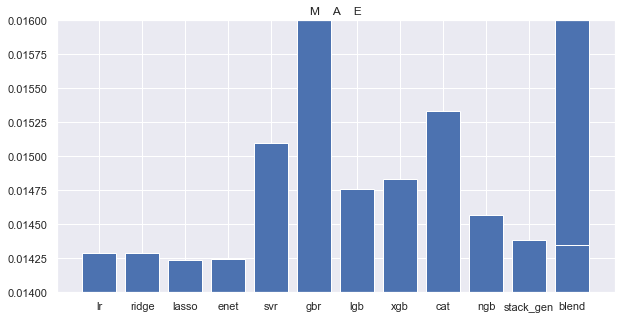

In [67]:
sns.set()
plt.figure(figsize=(10,5))
plt.ylim(0.014,0.016)
plt.title('M    A    E')
plt.bar(model_name,mae)